In [1]:
#!pip install sentinelhub

This notebook show how to use the odc_sh engine in order to load the Sentinel data using SentinelHUB.

In [1]:
import os 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import cartopy.crs as ccrs
from sentinelhub import DataCollection
import pandas

%matplotlib inline

from odc_sh import engine

os.environ["SH_CLIENT_ID"] = sh_client_id
os.environ["SH_CLIENT_SECRET"] = sh_client_secret

Load data from Sentinel HUB. For other collections check the DataCollection or examples folder.

List all available collections (in some cases additional filter is needed in order to differenciate between the collection ids - e. g. DataCollection.SENTINEL1)

Initialize datacube engine

In [2]:
dc = engine.Datacube()

In [5]:
products = dc.list_sh_products()
products

,name,api_id,service_url,sensor_type,collection_type,resolution
name,,,,,,
SENTINEL2_L1C,SENTINEL2_L1C,sentinel-2-l1c,https://services.sentinel-hub.com,MSI,Sentinel-2,None
SENTINEL2_L2A,SENTINEL2_L2A,sentinel-2-l2a,https://services.sentinel-hub.com,MSI,Sentinel-2,None
SENTINEL1_IW,SENTINEL1_IW,sentinel-1-grd,https://services.sentinel-hub.com,C-SAR,Sentinel-1,HIGH
SENTINEL1_IW_ASC,SENTINEL1_IW_ASC,sentinel-1-grd,https://services.sentinel-hub.com,C-SAR,Sentinel-1,HIGH
SENTINEL1_IW_DES,SENTINEL1_IW_DES,sentinel-1-grd,https://services.sentinel-hub.com,C-SAR,Sentinel-1,HIGH
SENTINEL1_EW,SENTINEL1_EW,sentinel-1-grd,https://services.sentinel-hub.com,C-SAR,Sentinel-1,MEDIUM
SENTINEL1_EW_ASC,SENTINEL1_EW_ASC,sentinel-1-grd,https://services.sentinel-hub.com,C-SAR,Sentinel-1,MEDIUM
SENTINEL1_EW_DES,SENTINEL1_EW_DES,sentinel-1-grd,https://services.sentinel-hub.com,C-SAR,Sentinel-1,MEDIUM
SENTINEL1_EW_SH,SENTINEL1_EW_SH,sentinel-1-grd,https://services.sentinel-hub.com,C-SAR,Sentinel-1,MEDIUM


In [4]:
bands = dc.list_sh_bands()
bands

,collection_name,name,units,output_types
0,SENTINEL2_L1C,B01,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
1,SENTINEL2_L1C,B02,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
2,SENTINEL2_L1C,B03,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
3,SENTINEL2_L1C,B04,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
4,SENTINEL2_L1C,B05,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
...,...,...,...,...
6,SENTINEL3_SLSTR,S7,"(Unit.BRIGHTNESS_TEMPERATURE,)","(<class 'numpy.float32'>,)"
7,SENTINEL3_SLSTR,S8,"(Unit.BRIGHTNESS_TEMPERATURE,)","(<class 'numpy.float32'>,)"
8,SENTINEL3_SLSTR,S9,"(Unit.BRIGHTNESS_TEMPERATURE,)","(<class 'numpy.float32'>,)"
9,SENTINEL3_SLSTR,F1,"(Unit.BRIGHTNESS_TEMPERATURE,)","(<class 'numpy.float32'>,)"


In [126]:
def dataframe_for_band(bands):
    band_info = pandas.DataFrame(bands)
    prod_name = np.empty(len(band_info), dtype=object)
    prod_name[:]=pr.name
    band_info.insert(0, "collection", prod_name)
    return band_info

In [128]:
        bands_info = []
        for pr in dc.get_available_collections():
            if not any(bands_info):
                bands_info = dataframe_for_band(pr.bands)
            else:
                bands_info = pandas.concat([bands_info, dataframe_for_band(pr.bands)]) 
        bands_info


,collection,name,units,output_types
0,SENTINEL2_L1C,B01,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
1,SENTINEL2_L1C,B02,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
2,SENTINEL2_L1C,B03,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
3,SENTINEL2_L1C,B04,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
4,SENTINEL2_L1C,B05,"(Unit.REFLECTANCE, Unit.DN)","(<class 'numpy.float32'>, <class 'numpy.uint16'>)"
...,...,...,...,...
6,SENTINEL3_SLSTR,S7,"(Unit.BRIGHTNESS_TEMPERATURE,)","(<class 'numpy.float32'>,)"
7,SENTINEL3_SLSTR,S8,"(Unit.BRIGHTNESS_TEMPERATURE,)","(<class 'numpy.float32'>,)"
8,SENTINEL3_SLSTR,S9,"(Unit.BRIGHTNESS_TEMPERATURE,)","(<class 'numpy.float32'>,)"
9,SENTINEL3_SLSTR,F1,"(Unit.BRIGHTNESS_TEMPERATURE,)","(<class 'numpy.float32'>,)"


In [8]:
col = dc.get_collection("SENTINEL2_L1C")
col.bands

(Band(name='B01', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)),
 Band(name='B02', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)),
 Band(name='B03', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)),
 Band(name='B04', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)),
 Band(name='B05', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)),
 Band(name='B06', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)),
 Band(name='B07', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)),

In [7]:
cols = ['bands']

import pandas
for pr in  dc.get_available_collections():
    print(pr.name)
    print(pandas.DataFrame.from_dict(pr.bands ))
    print(pandas.DataFrame.from_dict(pr.metabands))
    print("_____________________")

#rows = [[getattr(pr, col, None) for col in cols] for pr in DataCollection.get_available_collections()]
#pd = pandas.DataFrame(rows, columns=cols).set_index('name', drop=False)

SENTINEL2_L1C
   name                        units  \
0   B01  (Unit.REFLECTANCE, Unit.DN)   
1   B02  (Unit.REFLECTANCE, Unit.DN)   
2   B03  (Unit.REFLECTANCE, Unit.DN)   
3   B04  (Unit.REFLECTANCE, Unit.DN)   
4   B05  (Unit.REFLECTANCE, Unit.DN)   
5   B06  (Unit.REFLECTANCE, Unit.DN)   
6   B07  (Unit.REFLECTANCE, Unit.DN)   
7   B08  (Unit.REFLECTANCE, Unit.DN)   
8   B8A  (Unit.REFLECTANCE, Unit.DN)   
9   B09  (Unit.REFLECTANCE, Unit.DN)   
10  B10  (Unit.REFLECTANCE, Unit.DN)   
11  B11  (Unit.REFLECTANCE, Unit.DN)   
12  B12  (Unit.REFLECTANCE, Unit.DN)   

                                         output_types  
0   (<class 'numpy.float32'>, <class 'numpy.uint16'>)  
1   (<class 'numpy.float32'>, <class 'numpy.uint16'>)  
2   (<class 'numpy.float32'>, <class 'numpy.uint16'>)  
3   (<class 'numpy.float32'>, <class 'numpy.uint16'>)  
4   (<class 'numpy.float32'>, <class 'numpy.uint16'>)  
5   (<class 'numpy.float32'>, <class 'numpy.uint16'>)  
6   (<class 'numpy.float32'>, <cl

Load Sentinel 1 IW data. Additional filter with polarization needs to be specified. You can also limit the data by orbit.

In [6]:
resolution = 100  # in meters
longitude = (11.987527, 12.004914)
latitude = (41.990797, 42.018348)

time = ("2019-01-01", "2019-01-04")

ds = dc.load(
    product=DataCollection.SENTINEL2_L1C,
    latitude=latitude,
    longitude=longitude,
    time=time,
    sh_resolution=resolution,
    sh_client_id="6d4d39fa-bc22-4a26-b4e5-60abadaac0ac",
    sh_client_secret="50fd0886-c54b-4c52-8",
  #  sh_filter={"swath_mode": "IW", "orbit_direction": "DESCENDING"},
)

DataCollection.SENTINEL2_L1C
<enum 'DataCollection'>
Searching for new products
measurement: {'name': 'B01', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B02', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B03', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B04', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B05', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B06', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B07', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B08', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B8A', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B09', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B10', 'units': 'REFLECTANCE', 'dtype'

  0%|          | 0/1 [00:00<?, ?it/s]

---------------------------------------------
DatasetType(name='sentinel_2_l1c', id_=None)
longitude: 11.987527, 12.004914                     - latitude: 41.990797, 42.018348                     - resolution: 100 m                     - time: 2019-01-04 


  0%|          | 0/1 [00:00<?, ?it/s]

Display properties of the x-array datacube

Store downloaded data to .nc format

In [9]:
#ds.to_netcdf("s2_all_bands.nc")

You can load the data 

In [11]:
#ds_stored = xr.open_dataset("s2_all_bands.nc")
#ds_stored

<xarray.Dataset>
Dimensions:                        (time: 2, lon: 13, lat: 31, bands: 13)
Coordinates:
  * time                           (time) datetime64[ns] 2019-01-01 2019-01-04
  * lon                            (lon) float32 11.99 11.99 11.99 ... 12.0 12.0
  * lat                            (lat) float32 41.99 41.99 ... 42.02 42.02
  * bands                          (bands) object 'B01' 'B02' ... 'B11' 'B12'
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon, bands) float32 ...

Dislay available time intervals

In [12]:
for t in ds.time:
    print(f"times: {t.data}")

times: 2019-01-01T00:00:00.000000000
times: 2019-01-04T00:00:00.000000000


Get first available frame

In [13]:
single_time_frame = ds.sel(time=ds.time[0], bands=['B04','B03','B02'])
#single_time_frame

<xarray.DataArray (lat: 31, lon: 13, bands: 3)>
array([[[0.0368, 0.0801, 0.12  ],
        [0.0376, 0.0816, 0.1214],
        [0.0378, 0.0797, 0.1204],
        ...,
        [0.0379, 0.0818, 0.1213],
        [0.0392, 0.0878, 0.1242],
        [0.0448, 0.0935, 0.126 ]],

       [[0.0371, 0.0799, 0.1194],
        [0.038 , 0.081 , 0.1211],
        [0.0382, 0.0823, 0.1209],
        ...,
        [0.0391, 0.0866, 0.1211],
        [0.1242, 0.1216, 0.1439],
        [0.0977, 0.1057, 0.1302]],

       [[0.0374, 0.0829, 0.1219],
        [0.0378, 0.0796, 0.1198],
        [0.0383, 0.0812, 0.1203],
        ...,
...
        ...,
        [0.0915, 0.0911, 0.1159],
        [0.1139, 0.1039, 0.1242],
        [0.1143, 0.1051, 0.1249]],

       [[0.068 , 0.0961, 0.1167],
        [0.1049, 0.1209, 0.1302],
        [0.103 , 0.1088, 0.128 ],
        ...,
        [0.0937, 0.1042, 0.1256],
        [0.1081, 0.1031, 0.1247],
        [0.1229, 0.1092, 0.127 ]],

       [[0.0873, 0.099 , 0.1238],
        [0.1482, 0.1332, 0.1449],
        [0.086 , 0.1064, 0.1237],
        ...,
        [0.0864, 0.0915, 0.1163],
        [0.1263, 0.115 , 0.132 ],
        [0.0819, 0.0996, 0.1285]]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2019-01-01
  * lon      (lon) float32 11.99 11.99 11.99 11.99 11.99 ... 12.0 12.0 12.0 12.0
  * lat      (lat) float32 41.99 41.99 41.99 41.99 ... 42.01 42.02 42.02 42.02
  * bands    (bands) <U3 'B04' 'B03' 'B02'
Attributes:
    description:  Sentinel HUB export: sentinel-2-l1c
    bands:        ['B01' 'B02' 'B03' 'B04' 'B05' 'B06' 'B07' 'B08' 'B8A' 'B09...

time: 2019-01-01T00:00:00.000000000
time: 2019-01-04T00:00:00.000000000


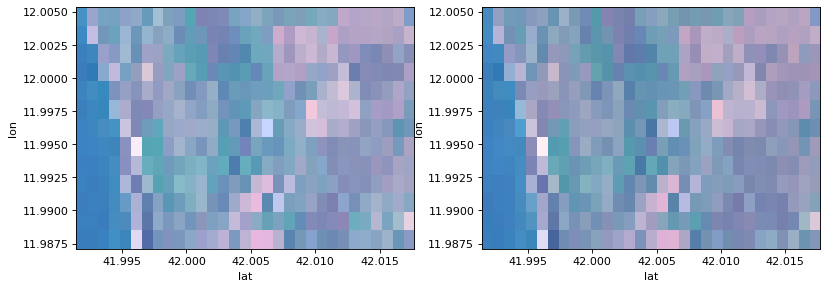

In [14]:
crs = ccrs.UTM("18")
fig, ax = plt.subplots(nrows=1, ncols=len(ds.time), figsize=(12, 4), dpi=80)

for idx, t in enumerate(ds.time):
    print(f"time: {t.data}")
    single_time_frame = ds.sel(time=ds.time[idx], bands=['B04','B03','B02'], drop=True)
    single_time_frame= single_time_frame / single_time_frame.data.max()
    imgplot = single_time_frame.plot.imshow(ax=ax[idx], x="lat", y="lon", rgb="bands")
    imgplot.set_cmap('OrRd')
plt.show()